In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')

In [3]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [13]:
data.shape

(1025, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

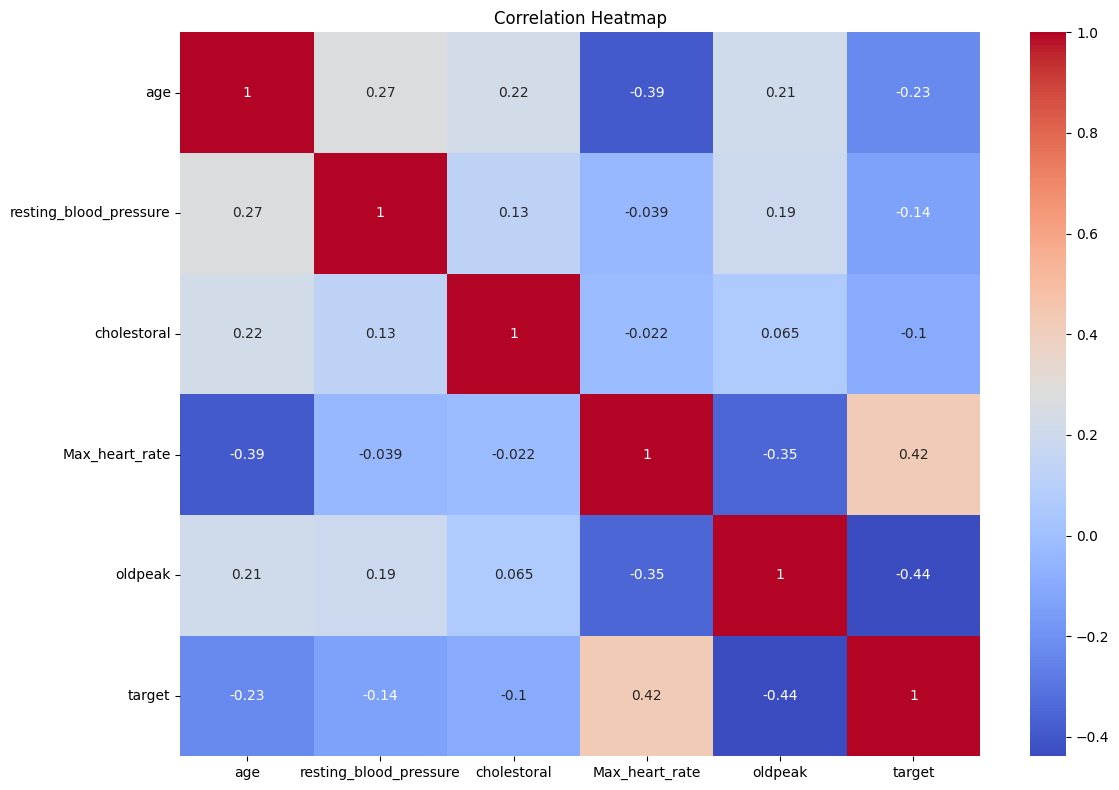

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

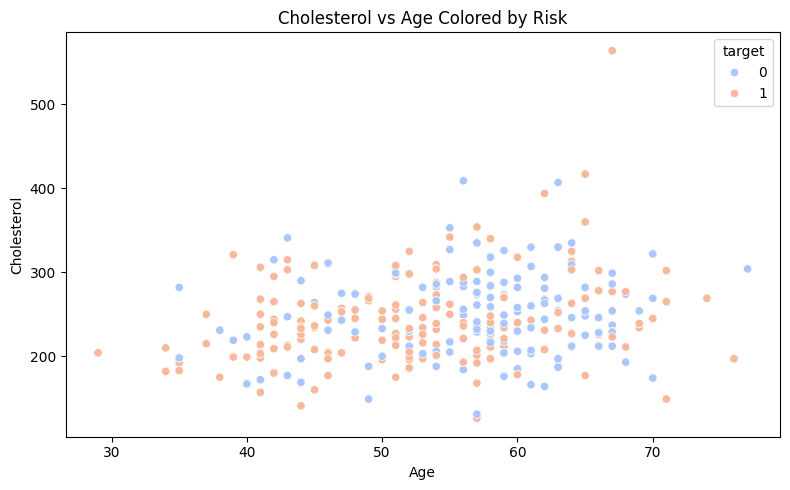

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='cholestoral', hue='target',data=data, palette='coolwarm')
plt.title("Cholesterol vs Age Colored by Risk")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.tight_layout()
plt.show()

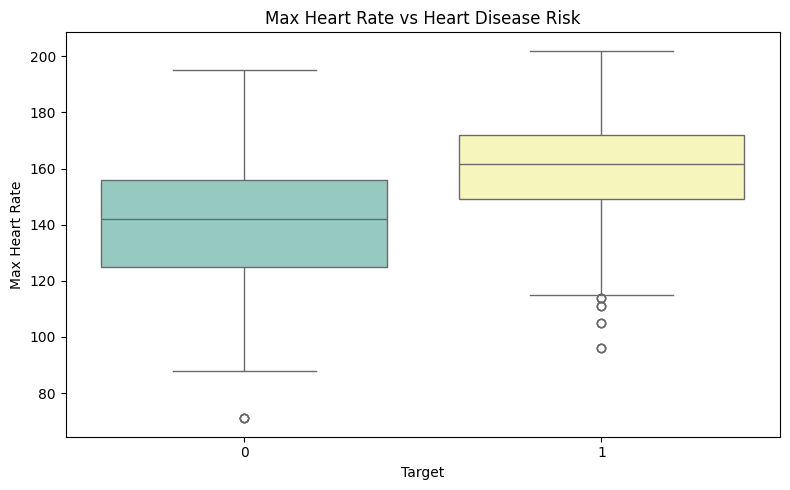

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='Max_heart_rate', data=data, hue='target', palette='Set3', legend=False)
plt.title("Max Heart Rate vs Heart Disease Risk")
plt.xlabel("Target")
plt.ylabel("Max Heart Rate")
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data_encoded = data.copy()
label_encoders = {}
for col in data_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

X=data_encoded.iloc[:,:-1]
y=data_encoded.iloc[:,-1]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
lr_model= DecisionTreeClassifier(random_state=42)
lr_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
ROC AUC Score: 0.9854368932038835


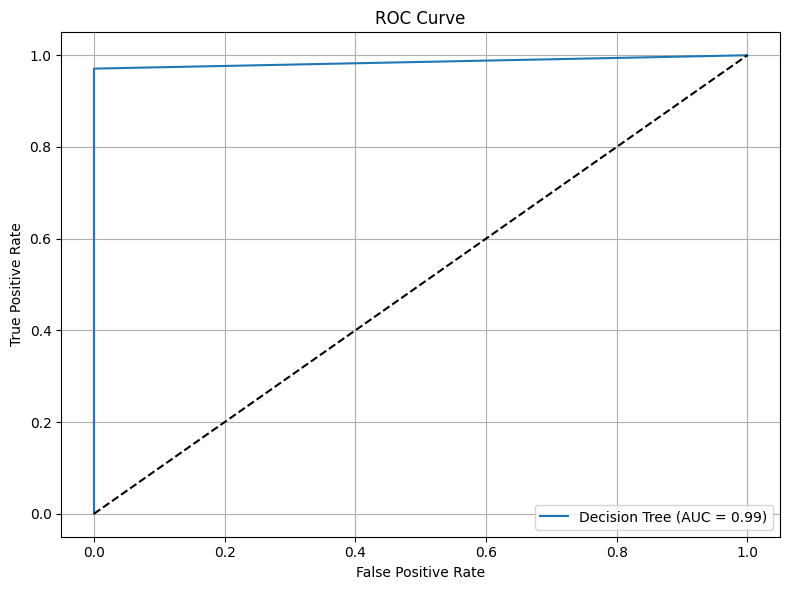

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


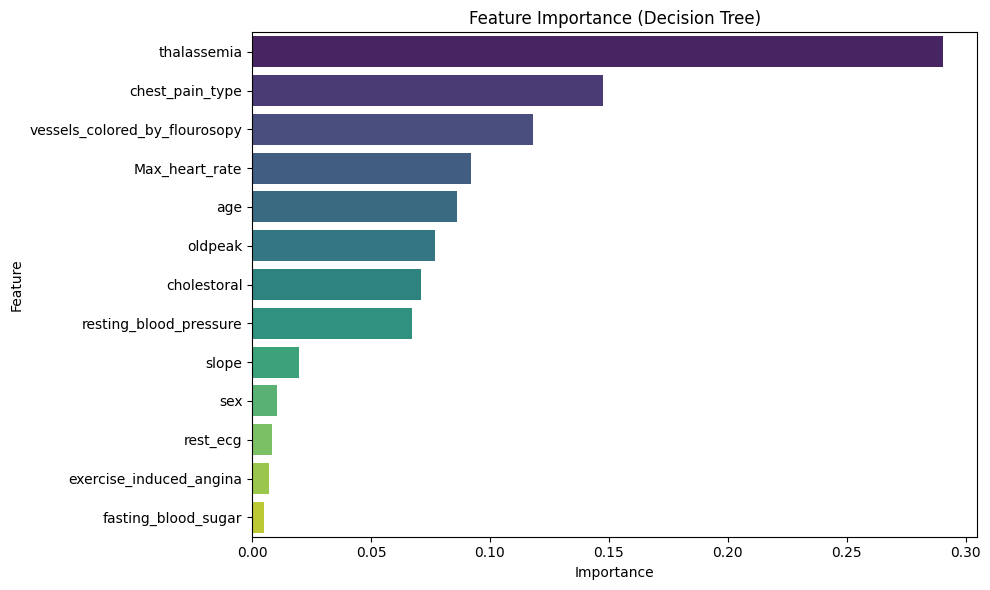

Top 10 Important Features:
                           Feature  Importance
12                    thalassemia    0.290457
2                 chest_pain_type    0.147385
11  vessels_colored_by_flourosopy    0.118248
7                  Max_heart_rate    0.092029
0                             age    0.086161
9                         oldpeak    0.076793
4                     cholestoral    0.071069
3          resting_blood_pressure    0.067393
10                          slope    0.019771
1                             sex    0.010372


In [65]:
importances = lr_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()

print("Top 10 Important Features:\n", feature_importance_df.head(10))
